In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rrcf

# Set parameters
np.random.seed(0)
n = 2010
d = 3
num_trees = 100
tree_size = 256

# Generate data
X = np.zeros((n, d))
X[:1000,0] = 5
X[1000:2000,0] = -5
X += 0.01*np.random.randn(*X.shape)

# Construct forest
forest = []
while len(forest) < num_trees:
    # Select random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size),
                            replace=False)
    # Add sampled trees to forest
    trees = [rrcf.RCTree(X[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)




In [2]:
# Compute average CoDisp with the cut dimension for each point
dim_codisp = np.zeros([n,d],dtype=float)
index = np.zeros(n)
for tree in forest:
    for leaf in tree.leaves:
        codisp,cutdim = tree.codisp_with_cut_dimension(leaf)
        
        dim_codisp[leaf,cutdim] += codisp 

        index[leaf] += 1

avg_codisp = dim_codisp.sum(axis=1)/index

#codisp anomaly threshold and calculate the mean over each feature
feature_importance_anomaly = np.mean(dim_codisp[avg_codisp>50,:],axis=0)
#create a dataframe with the feature importance
df_feature_importance = pd.DataFrame(feature_importance_anomaly,columns=['feature_importance'])
df_feature_importance


,feature_importance
0,810.375000
1,58.913889
2,54.170635


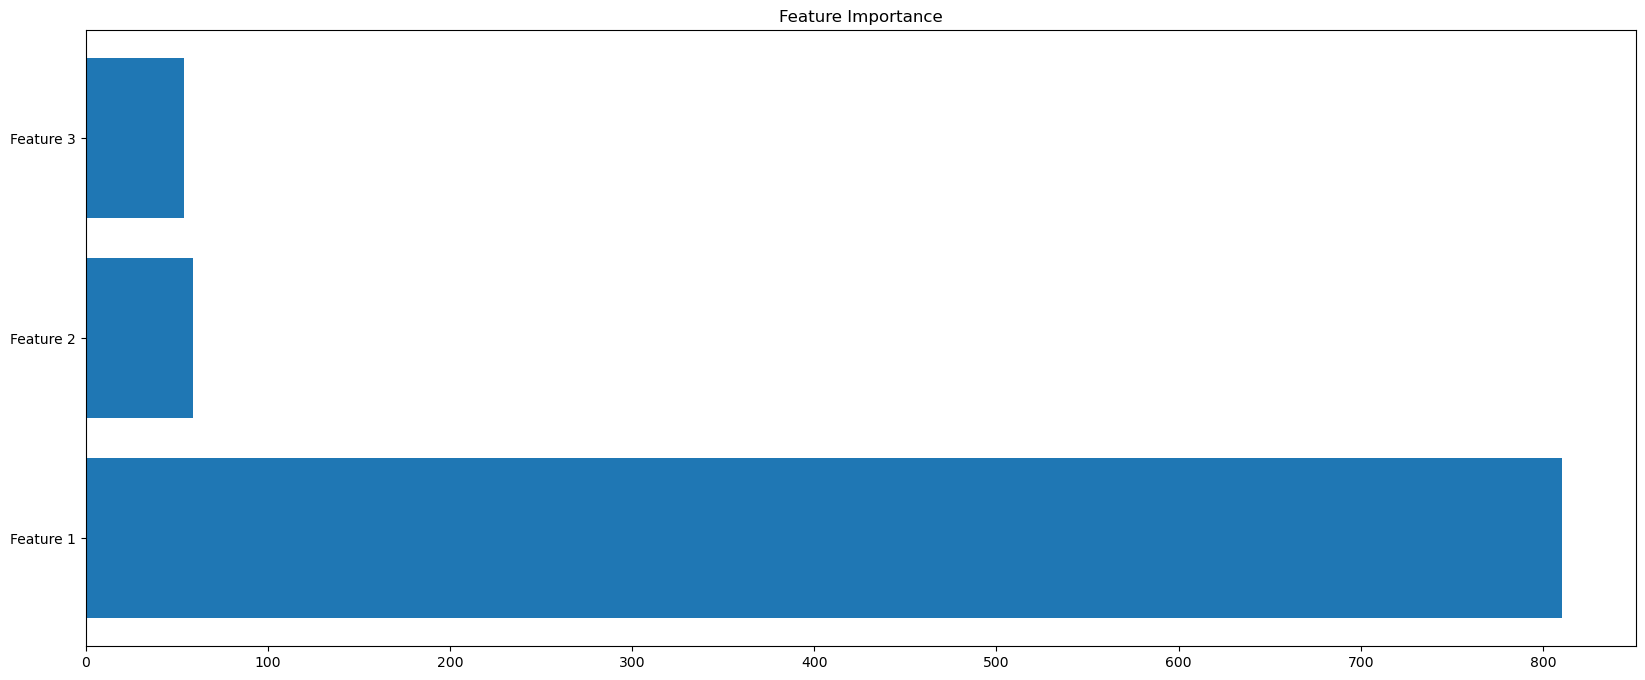

In [3]:
# df_feature_importance.plot(kind='bar',title='Feature Importance',figsize=(15,5))

plt.figure(figsize=(20,8))
plt.title('Feature Importance')
plt.barh(['Feature 1','Feature 2','Feature 3'],feature_importance_anomaly)

plt.show()

In [12]:
forest_1 = rrcf.Forest(num_trees,tree_size,X)

In [5]:
codisp_dim_list = [forest_1.mean_codisp(x) for x in range(n)]

In [13]:

codisp_dim_list = [forest_1.mean_codisp_dimension(x) for x in range(n)]

In [15]:
codisp_dim_array = np.array(codisp_dim_list)
mean_codisp = np.sum(codisp_dim_array,axis=1)
feature_importance_anomaly_1 = np.mean(codisp_dim_array[mean_codisp>50,:],axis=0)
df_feature_importance = pd.DataFrame(feature_importance_anomaly_1,columns=['feature_importance'])
df_feature_importance

,feature_importance
0,75.962417
1,0.000000
2,0.000000


In [11]:
mean_codisp

array([ 5.73014456, 15.60547786,  2.10746976, ..., 48.875     ,
       79.875     , 89.9375    ])